<center><h1>Нелинейный маятник: численное моделирование</h1></center>

In [36]:
import numpy as np

%matplotlib inline 
import matplotlib.pylab as plt
plt.style.use('ggplot')

In [37]:
# начальные условия
m = 0.05
g = 9.816
l = 0.03
tau = 0.001
N = 1000
x_0 = 2
v_0 = 0

In [38]:
def total_energy(x, v):
    return (m * l**2) * (v**2/2 + (g/l) * (1 - np.cos(x))) 

In [39]:
def acceleration(x):
    return -g * np.sin(x) / l

## Метод Эйлера

In [40]:
x_current = x_0
v_current = v_0
time_current = 0.0
t_euler = np.empty(shape=N)
e_euler = np.empty(shape=N)

for i in range(N):
    e_euler[i] = total_energy(x_current, v_current)
    t_euler[i] = time_current
    
    time_current += tau
    v_temp = v_current
    v_current += tau * acceleration(x_current)
    x_current += tau * v_temp

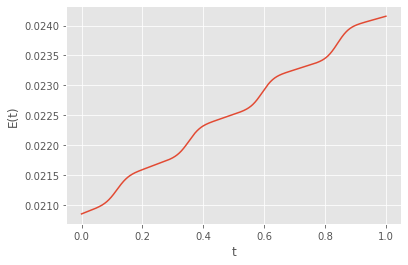

In [41]:
plt.plot(t_euler, e_euler);
plt.xlabel('t')
plt.ylabel('E(t)');

## Предиктор-корректор

In [46]:
x_current = x_0
v_current = v_0

time_current = 0.0
t_pc = np.empty(shape=N)
e_pc = np.empty(shape=N)

def predictor_corrector(tau, x_current, v_current, time_current, t_pc, e_pc):
    for i in range(N):
        e_pc[i] = total_energy(x_current, v_current)
        t_pc[i] = time_current

        v_temp = v_current + acceleration(x_current) * tau
        x_temp  = x_current + v_current * tau
        v_cache = v_current

        time_current += tau
        v_current += (acceleration(x_current) + acceleration(x_temp))/2 * tau
        x_current += (v_cache + v_temp)/2 * tau
        
    return t_pc, e_pc
        
t_pc, e_pc = predictor_corrector(tau, x_current, v_current, time_current, t_pc, e_pc)

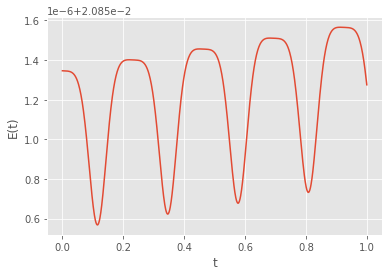

In [47]:
plt.plot(t_pc, e_pc);
plt.xlabel('t')
plt.ylabel('E(t)');

## Метод Эйлера-Кромера

In [44]:
x_current = x_0
v_current = v_0
time_current = 0.0
t_ek = np.empty(shape=N)
e_ek = np.empty(shape=N)

def euler_cromer(tau, x_current, v_current, time_current, t_ek, e_ek):
    for i in range(N):
        e_ek[i] = total_energy(x_current, v_current)
        t_ek[i] = time_current
    
        time_current += tau
        v_current += tau * acceleration(x_current)
        x_current += tau * v_current
        
    return t_ek, e_ek
    
t_ek, e_ek = euler_cromer(tau, x_current, v_current, time_current, t_ek, e_ek)

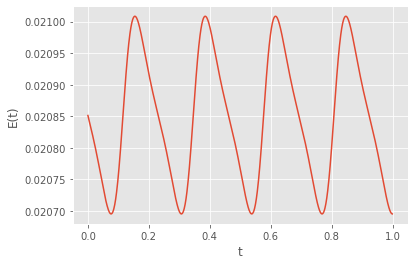

In [45]:
plt.plot(t_ek, e_ek);
plt.xlabel('t')
plt.ylabel('E(t)');

## На одном графике

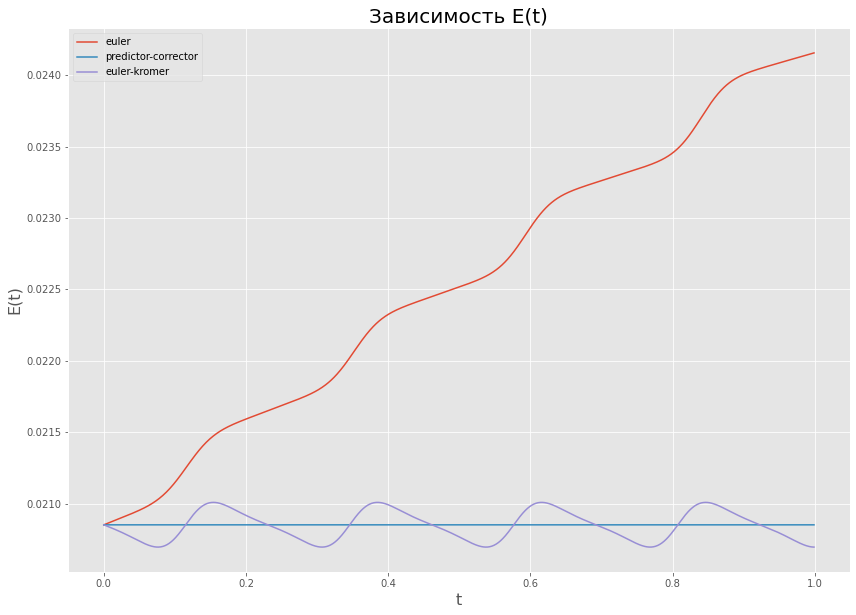

In [11]:
plt.figure(figsize=(14, 10))
plt.plot(t_euler, e_euler, label='euler')
plt.plot(t_pc, e_pc, label='predictor-corrector')
plt.plot(t_ek, e_ek, label='euler-kromer')
plt.xlabel('t', fontsize=16)
plt.ylabel('E(t)', fontsize=16)
plt.title('Зависимость E(t)', fontsize=20)

plt.legend();

# Оценка величины ошибки от шага

In [12]:
def loss(y_pred, y_true):
    return np.abs(y_pred - y_true)

In [49]:
def euler_cromer(tau, x_current, v_current, time_current, t_ek, e_ek):
    e_true = total_energy(x_current, v_current)
    for i in range(N):
        
        e_ek[i] = loss(total_energy(x_current, v_current), e_true)
        t_ek[i] = time_current
    
        time_current += tau
        v_current += tau * acceleration(x_current)
        x_current += tau * v_current
        
    return np.mean(e_ek)

In [50]:
def predictor_corrector(tau, x_current, v_current, time_current, t_pc, e_pc):
    e_true = total_energy(x_current, v_current)
    for i in range(N):
        e_pc[i] = loss(total_energy(x_current, v_current), e_true)
        t_pc[i] = time_current

        v_temp = v_current + acceleration(x_current) * tau
        x_temp  = x_current + v_current * tau
        v_cache = v_current

        time_current += tau
        v_current += (acceleration(x_current) + acceleration(x_temp))/2 * tau
        x_current += (v_cache + v_temp)/2 * tau
        
    return np.mean(e_pc)

In [54]:
taus = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

pc_losses, ek_losses = [], []

for tau in taus:
    x_current_pc = x_0
    v_current_pc = v_0

    time_current_pc = 0.0
    t_pc = np.empty(shape=N)
    e_pc = np.empty(shape=N)
    
    x_current_ek = x_0
    v_current_ek = v_0
    time_current_ek = 0.0
    t_ek = np.empty(shape=N)
    e_ek = np.empty(shape=N)
    
    pc_loss = predictor_corrector(tau, x_current, v_current, time_current, t_pc, e_pc)
    ek_loss = euler_cromer(tau, x_current, v_current, time_current, t_ek, e_ek)
    
    ek_losses.append(ek_loss)
    pc_losses.append(pc_loss)

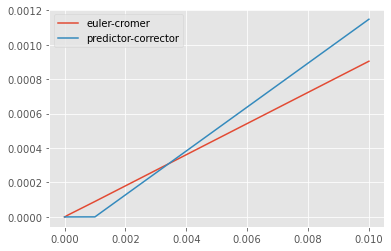

In [58]:
plt.plot(taus, ek_losses, label='euler-cromer')
plt.plot(taus, pc_losses, label='predictor-corrector');
plt.legend()